# Titanic: 타이타닉호의 생존률 예측

---

- 침몰된 타이타닉호로부터 살아나온 생존자에 대해서 분석
- 어떤 변수가 생존율에 영향을 더 미쳤는지 파악해 보자

In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # 데이터 시각화를 Python 라이브러리
import seaborn as sns  # 데이터 시각화를 Python 라이브러리

from IPython.display import Image # 주피터 노트북에 이미지 삽입을 위한 라이브러리

%matplotlib inline 

# 화면에 보이는 테이블 정보량 설정
pd.set_option('max_rows', 30)
pd.set_option('max_columns', 15) 

import warnings
warnings.filterwarnings('ignore')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8
rcParams['axes.grid'] = True


# 1. 훈련 데이터 살펴보기

## 변수 살펴보기

In [65]:
path = 'data/titanic/'
train_df = pd.read_csv(path + 'titanic_train.csv')
test_df = pd.read_csv(path + 'titanic_test.csv')

print('Train shape : ', train_df.shape)  # 7
print('Test shape : ', test_df.shape)  # 3

Train shape :  (891, 12)
Test shape :  (418, 11)


In [66]:
print('=' * 20, 'Train_DF Info', '=' * 20)
train_df.info()
print('')
print('=' * 20, 'Test_DF Info', '=' * 20)
test_df.info()

==================== Train_DF Info ====================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

==================== Test_DF Info ====================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-n

In [67]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 변수 간 상관관계는 어느 정도일까?

### 상관계수(Correlation Coefficient)

- 두 변수간에 어떤 선형적 관계를 갖고 있는 지를 분석하는 방법이다.
- 두 변수는 서로 독립적인 관계로부터 서로 상관된 관계일 수 있으며 이때 두 변수간의 관계의 강도를 상관관계(Correlation, Correlation coefficient)라 한다.

In [68]:
train_df[["Survived", "Pclass", "SibSp", "Parch", "Age", "Fare"]].corr()

,Survived,Pclass,SibSp,Parch,Age,Fare
Survived,1.000000,-0.338481,-0.035322,0.081629,-0.077221,0.257307
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.369226,-0.549500
SibSp,-0.035322,0.083081,1.000000,0.414838,-0.308247,0.159651
Parch,0.081629,0.018443,0.414838,1.000000,-0.189119,0.216225
Age,-0.077221,-0.369226,-0.308247,-0.189119,1.000000,0.096067
Fare,0.257307,-0.549500,0.159651,0.216225,0.096067,1.000000


> **Q. 모든 컬럼을 대상으로 상관계수(corr())을 알아보려면 어떻게 해야할까?**

In [69]:
# 작성해보세요~
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


> **Q. 그런데 처음에 모든 컬럼을 대상으로 하지 않고 몇 가지 컬럼만 선택해서 상관관계를 파악했을까요?**

### 테이블 보단 역시 그림, heatmap!

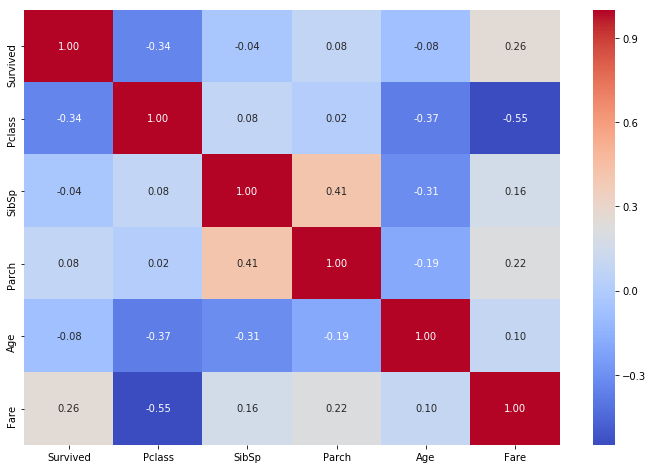

In [70]:
sns.heatmap(
    train_df[["Survived","Pclass","SibSp","Parch","Age","Fare"]].corr(),  # value
    annot=True,  # 주석
    fmt=".2f",  # format
    cmap="coolwarm"  # color
);

### Embarked 컬럼의 결측치를 채워보자.

In [71]:
train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [72]:
train_df['Embarked'].value_counts() / train_df.shape[0] * 100

S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64

In [73]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [74]:
train_df['Embarked'].isnull().any()

False

### Age 컬럼의 결측치를 채워보자.

In [75]:
# 결측치 비율 확인
train_df['Age'].isnull().sum() / len(train_df['Age']) * 100

19.865319865319865

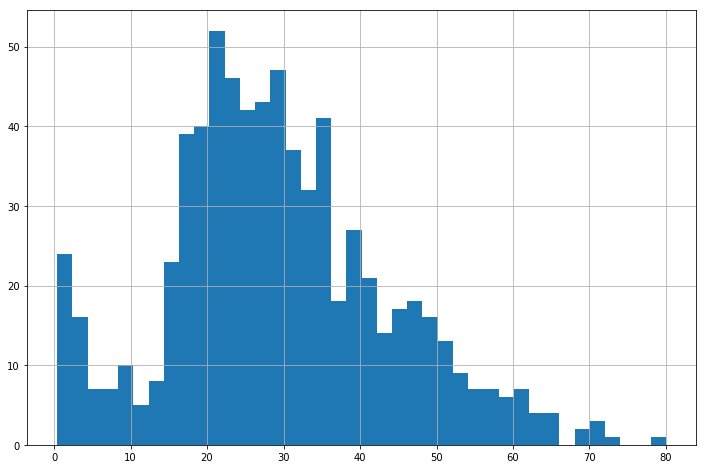

In [76]:
train_df['Age'].hist(bins=40);

> 여러가지 컬럼값을 하나의 그래프로 나타내는 방법들도 존재한다!

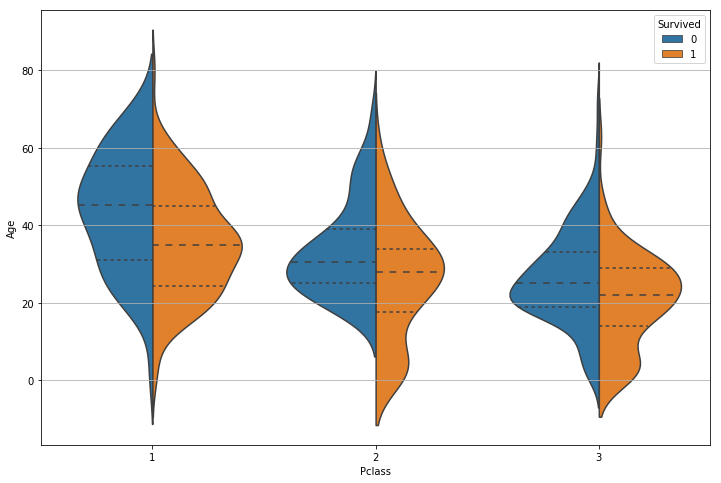

In [77]:
sns.violinplot('Pclass', 
               'Age', 
               hue='Survived', 
               data=train_df, 
               split=True, 
               inner="quartile");

> 다양한 시각화 방법이 존재한다.

---

In [78]:
pd.crosstab(train_df['Pclass'], train_df['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


> Q. 

> 1. 탑승항('Embarked')을 기준으로 승객을 분류하여
> 2. 각각의 승객의 나이에 따른 
> 3. 생존 여부를 violinplot 그래프를 이용해서 표현해보자.

> **탑승항에 따른 생존율의 차이가 나타나는가?**

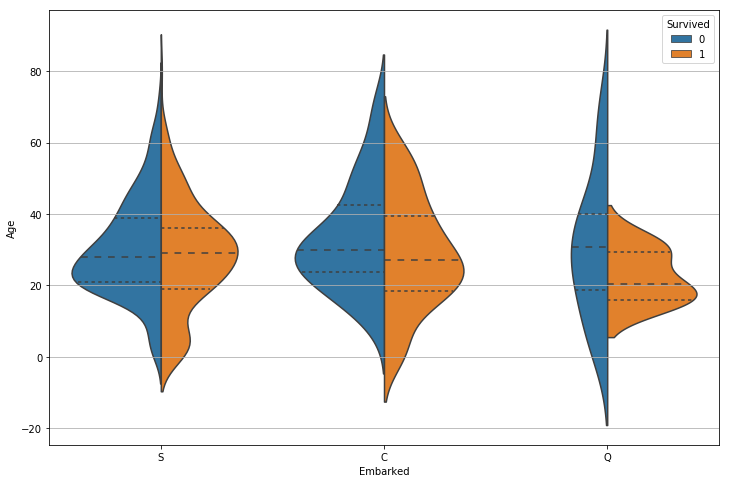

In [79]:
sns.violinplot(
    'Embarked',
    'Age', 
    hue='Survived', 
    data=train_df, 
    split=True, 
    inner="quartile");

> Q. 

> 1. 성별('Sex')을 기준으로 승객을 분류하여 
> 2. 각각의 승객의 나이에 따른 
> 3. 생존 여부를 그래프로 표현해보자. 

> **성별에 따른 생존율의 차이가 나타나는가?**

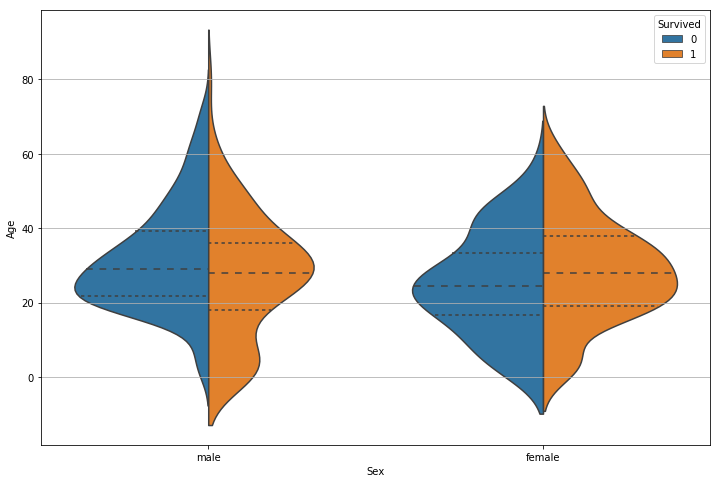

In [80]:
sns.violinplot(
    'Sex', 
    'Age', 
    hue='Survived', data=train_df, split=True, inner="quartile");

> Q. **성별('Sex')에 따른 승객의 생존자 수를 crosstab으로 표현해보자. 성별에 따른 생존율의 차이가 나타나는가?**

In [81]:
pd.crosstab(train_df['Sex'], train_df['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## Age의 결측치를 채워보자.

> 평균?

In [82]:
train['Age'].mean()

29.69911764705882

> 중앙값?

In [83]:
train_df['Age'].median()

28.0

> 최빈값?

In [84]:
train_df['Age'].mode()

0    24.0
dtype: float64

> **성별에 따른 나이차는 없을까?**

In [85]:
train[train['Sex'] == 'male'].Age.mean()

30.72664459161148

In [86]:
train[train['Sex'] == 'female']['Age'].mean()

27.915708812260537

> **Q. 승객의 성별('Sex') 나이의 중앙값을 찾아보자.**

In [87]:
train_df[train_df['Sex'] == 'male']['Age'].median()

29.0

In [88]:
train_df[train_df['Sex'] == 'female']['Age'].median()

27.0

> **Q. 승객의 선실 등급('Pclass')별 나이의 평균을 찾아보자.**

In [ ]:
train[train["Pclass"] == 1].Age.mean()

In [89]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [90]:
train_df[train_df['Pclass'] == 1]['Age'].median()

37.0

In [91]:
train_df[train_df['Pclass']==2]['Age'].median()

29.0

In [92]:
train_df[train_df['Pclass']==3]['Age'].median()

24.0

> **Q. 승객의 선실 등급('Pclass')과 성별('Sex)을 둘다 고려하여 분류하고 각각의 나이의 중앙값을 찾아보자. (1등석에 탑승한 여자의 나이의 Median은? 2등석에 탑승한 남자의 나이의 Median은?)**

In [93]:
train_df[(train_df['Sex']=='male') & (train_df['Pclass']==1)]['Age'].median()

40.0

In [94]:
train_df[(train_df['Sex']=='male') & (train_df['Pclass']==2)]['Age'].median()

30.0

In [95]:
train_df[(train_df['Sex']=='male') & (train_df['Pclass']==3)]['Age'].median()

25.0

In [96]:
train_df[(train_df['Sex']=='female') & (train_df['Pclass']==1)]['Age'].median()

35.0

In [97]:
train_df[(train_df['Sex']=='female') & (train_df['Pclass']==2)]['Age'].median()

28.0

In [98]:
train_df[(train_df['Sex']=='female') & (train_df['Pclass']==3)]['Age'].median()

21.5

> 이 자료를 이용하여 Age의 결측치를 채워보자.

In [99]:
median_male_1 = train_df[
    (train_df['Sex'] == 'male') & (train_df['Pclass'] == 1)
]['Age'].median()

In [100]:
median_male_2 = train_df[(train_df['Sex']=='male') & (train_df['Pclass']==2)]['Age'].median()
median_male_3 = train_df[(train_df['Sex']=='male') & (train_df['Pclass']==3)]['Age'].median()
median_female_1 = train_df[(train_df['Sex']=='female') & (train_df['Pclass']==1)]['Age'].median()
median_female_2 = train_df[(train_df['Sex']=='female') & (train_df['Pclass']==2)]['Age'].median()
median_female_3 = train_df[(train_df['Sex']=='female') & (train_df['Pclass']==3)]['Age'].median()

In [101]:
train_df['Age'].isnull().sum()

177

In [102]:
train_df.loc[
    (train_df['Age'].isnull()) & (train_df['Sex'] == 'male') 
    & (train_df['Pclass'] == 1),
    'Age'
] = median_male_1

In [103]:
train_df['Age'].isnull().sum()

156

> **Q. 같은 방식으로 나머지 결측치도 채워보자.**

In [104]:
train_df.loc[(train_df['Age'].isnull())&(train_df['Sex']=='male')&(train_df['Pclass']==2),'Age'] = median_male_2
train_df.loc[(train_df['Age'].isnull())&(train_df['Sex']=='male')&(train_df['Pclass']==3),'Age'] = median_male_3
train_df.loc[(train_df['Age'].isnull())&(train_df['Sex']=='female')&(train_df['Pclass']==1),'Age'] = median_female_1
train_df.loc[(train_df['Age'].isnull())&(train_df['Sex']=='female')&(train_df['Pclass']==2),'Age'] = median_female_2
train_df.loc[(train_df['Age'].isnull())&(train_df['Sex']=='female')&(train_df['Pclass']==3),'Age'] = median_female_3

In [105]:
train_df['Age'].isnull().sum()

0

In [106]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

---

### Cabin의 결측치 채우기

In [107]:
train_df['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [108]:
train_df['Cabin'].sample(30)

207        NaN
65         NaN
281        NaN
334        NaN
150        NaN
176        NaN
224        C93
751       E121
357        NaN
101        NaN
390    B96 B98
664        NaN
672        NaN
730         B5
78         NaN
217        NaN
862        D17
576        NaN
578        NaN
861        NaN
53         NaN
539        B39
538        NaN
600        NaN
800        NaN
648        NaN
247        NaN
358        NaN
660        NaN
815       B102
Name: Cabin, dtype: object

In [109]:
train_df.shape

(891, 12)

> **Cabin 컬럼을 채우는 것이 의미가 있을까? 채워지는 데이터는 신뢰할 수 있는걸까?**

> **Q. Cabin 컬럼을 데이터 프레임에서 제거해보자.**

In [110]:
train_df = train_df.drop(['Cabin'], axis=1)

## 생존예측에 도움이 되지 않는 변수 제거

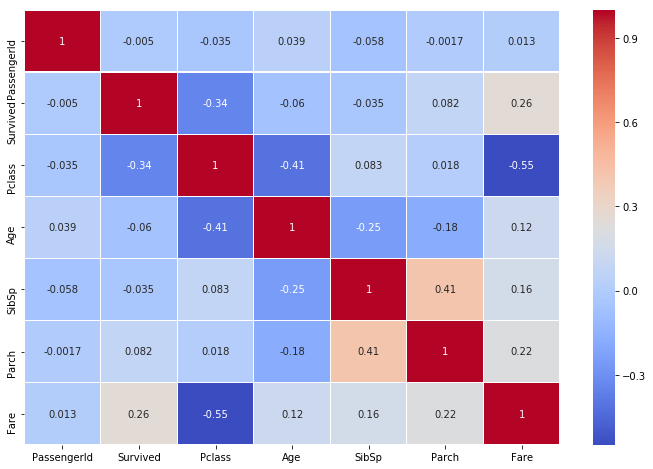

In [111]:
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', linewidths=0.2);

In [112]:
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

## 기존 데이터 셋의 정보를 이용하여 새로운 컬럼을 추가해보자(Feature Engineering!)

In [113]:
train_df['Fsize'] = train_df['SibSp'] + train_df['Parch'] + 1

> Q. 새로 추가한 'Fsize' 컬럼이 대체하는 'SibSp'와 'Parch' 두 컬럼을 데이터 프레임에서 제거해 보자.

In [114]:
train_df = train_df.drop(['SibSp','Parch'], axis=1)

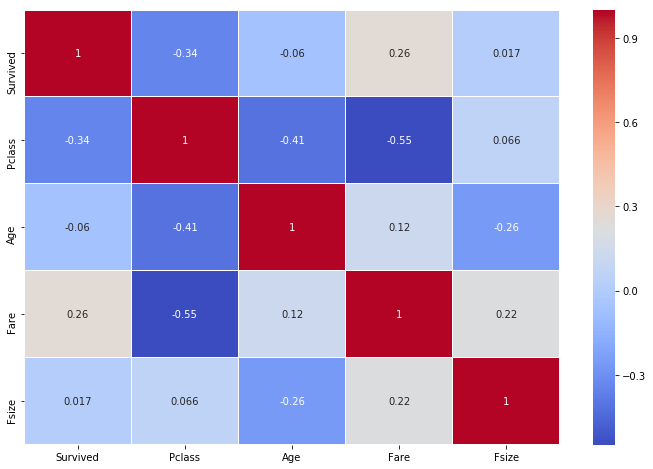

In [115]:
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', linewidths=0.2);

In [116]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Fsize'], dtype='object')

## Encoding : 기계학습을 위해 문자열을 숫자로 치환하여 보자.

In [117]:
train_df['Sex'] = train_df['Sex'].replace(['male','female'], [0, 1])
train_df['Embarked'] = train_df['Embarked'].replace(['S','C','Q'], [0, 1, 2])

# One Hot Encoding

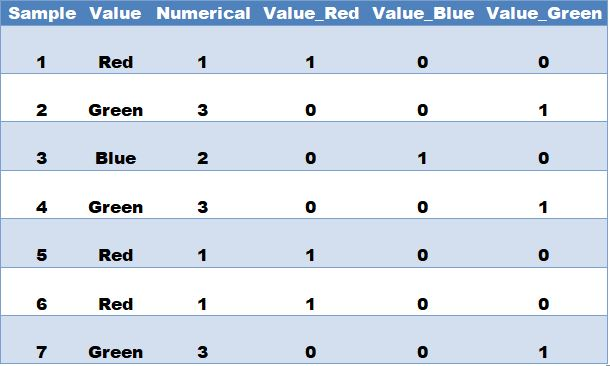

In [118]:
Image('https://yashuseth.files.wordpress.com/2017/12/table.jpg')

### Encode Embarked

In [119]:
train_embarked = pd.get_dummies(train_df["Embarked"], prefix="Embarked")

print(train_embarked.shape)
train_embarked.head()

(891, 3)


,Embarked_0,Embarked_1,Embarked_2
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [120]:
train_df = pd.concat([train_df, train_embarked], axis=1)

print(train_df.shape)
train_df[["Embarked", "Embarked_0", "Embarked_1", "Embarked_2"]].head()

(891, 10)


,Embarked,Embarked_0,Embarked_1,Embarked_2
0,0,1,0,0
1,1,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


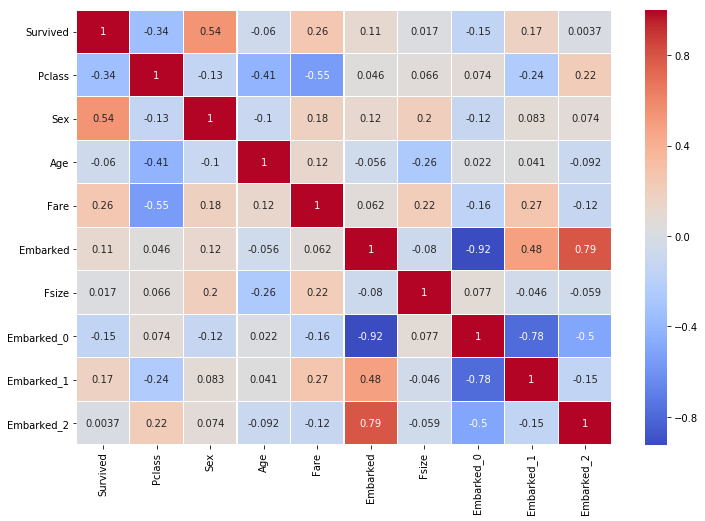

In [121]:
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', linewidths=0.2);